In [41]:
# import necessary libraries
from img_util import ImageDataLoader as IDL
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

def fBV_extractor(image, mask) -> float:
    """Computes the percentage of the lesion in the given (RGB) image
    that consists of blue / purple-ish pixels (blue veils).
    It outputs a value between 0 and 1, where a 0 indicates total 
    absence of blue veils, and a 1 indicates that the lesion is
    completely covered in blue veils.
    
    :param image: The RGB image to be analysed
    :param mask: The mask for the given image
    :return: Float with value between 0 and 1
    
    """

    # store n. of pixels in the mask
    tot_pixels = np.count_nonzero(mask)

    # convert image to HSV and apply mask
    image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # make the mask 3D
    mask_3D = mask[:, :, np.newaxis]

    # apply mask
    image_hsv = image_hsv * mask_3D

    # extract H channel
    h = image_hsv[:, :, 0]

    # create mask to filter out all pixels that are not blue / purple-ish
    bp_mask = (image_hsv[:, :, 0] >= 100) & (image_hsv[:, :, 0] <= 145)
    bp_mask_3D = bp_mask[:, :, np.newaxis]
    # Note: H is in degrees, but in cv2 its range is not 0-360 but 0-179, so we halve the values

    # TEST PURPOSES
    test_img = image_hsv * bp_mask_3D

    # store n. of blue / purple pixels
    veil_pixels = np.count_nonzero(bp_mask)

    # compute portion of lesion covered by blue veils
    BV = veil_pixels / tot_pixels
    # value from 0 to 1: from no blue veils to entirely covered in blue veils

    return test_img, BV

In [42]:
# set up relevant directories
img_dir = '../data/lesion_imgs/'
mask_dir = '../data/lesion_masks/'
# load up the images and relative masks
data_loader = IDL(img_dir, mask_dir)

data_iterator = iter(data_loader)

In [43]:
# skip random n of images
n = random.randint(0, 2000)
print(n)
for _ in range(n):
    next(data_iterator)

873


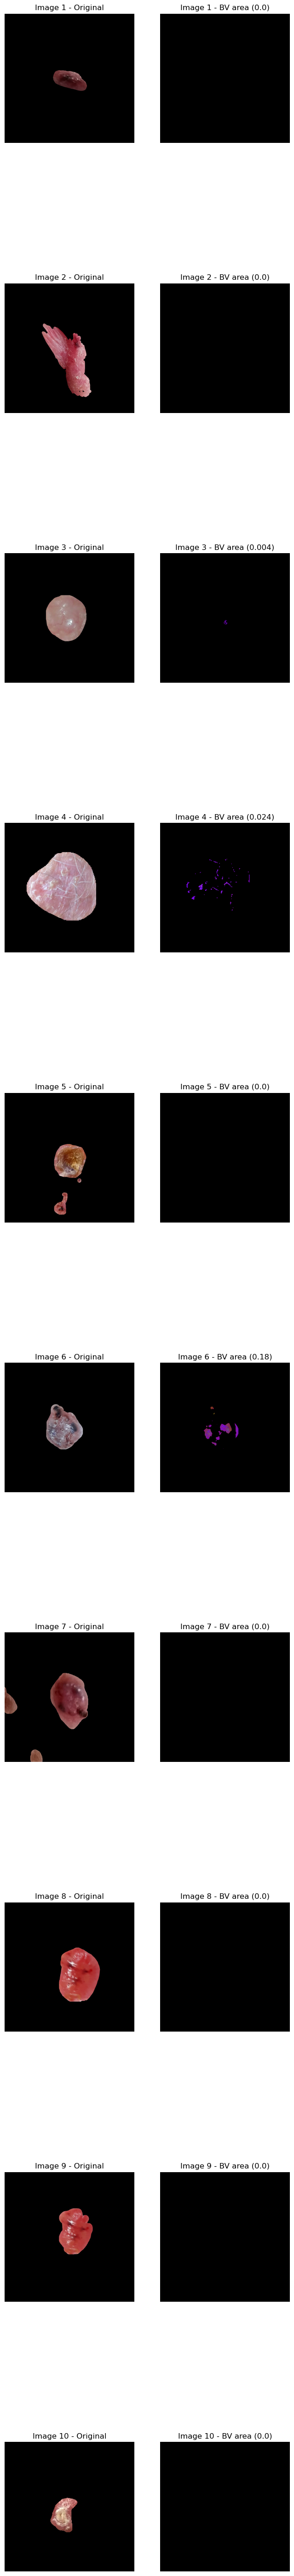

In [44]:
# plot 10 random imgs

fig, axes = plt.subplots(10, 2, figsize= (8, 75))

for i in range(10):
    img_rgb, img_gray, mask, name = next(data_iterator)

    test_img, BV = fBV_extractor(img_rgb, mask)

    img_rgb[mask == 0] = [0, 0, 0]

    axes[i, 0].imshow(img_rgb)
    axes[i, 0].axis('off')
    axes[i, 0].set_title(f"Image {i+1} - Original")

    axes[i, 1].imshow(test_img)
    axes[i, 1].axis('off')
    axes[i, 1].set_title(f"Image {i+1} - BV area ({round(BV, 3)})")

plt.show()
